In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

c:\anaconda\envs\rec_venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Salus X Labs\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
books = pd.read_csv(f"{path}/books.csv")

In [4]:
df = pd.DataFrame(books)

In [5]:
df.shape

(6810, 12)

In [6]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


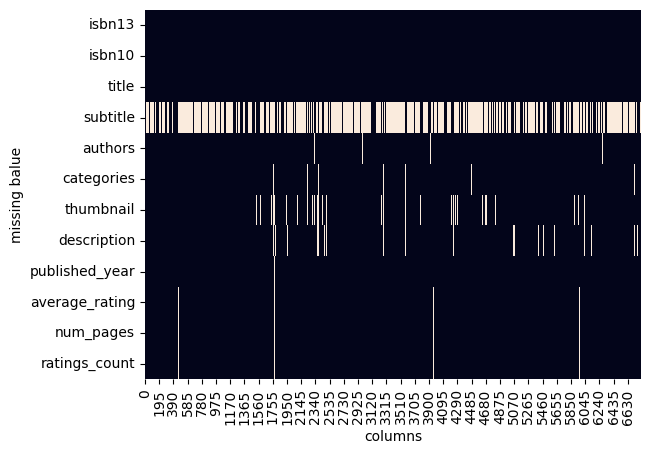

In [7]:
ax = plt.axes()
sns.heatmap(df.isnull().transpose(), cbar=False, ax=ax)

plt.xlabel("columns")
plt.ylabel("missing balue")

plt.show()

In [8]:
df["missing_desc"] = np.where(df["description"].isna(), 1, 0)
df["age_of_book"] = 2024 - df["published_year"]

In [9]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_desc', 'age_of_book'],
      dtype='object')

In [10]:
df[:2]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0


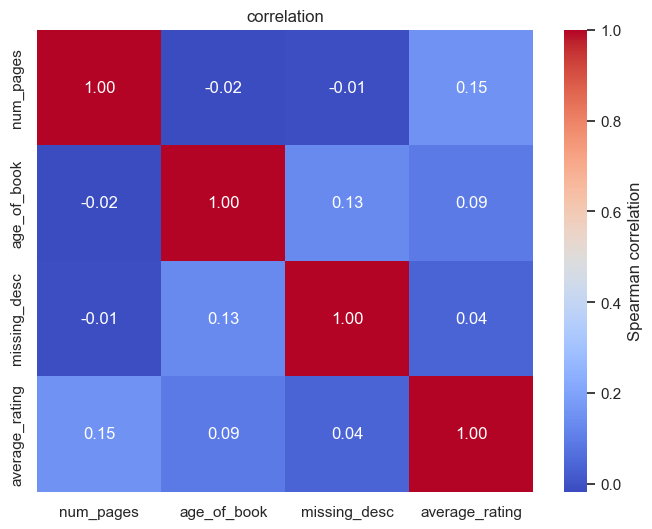

In [11]:
columns_of_interest = ["num_pages", "age_of_book", "missing_desc" , "average_rating"]
correlation_matrix = df[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("correlation")
plt.show()

In [12]:
# Select rows where all of the specified columns are non-missing.

df = df[~(df["description"].isna()) &
    ~(df["num_pages"].isna()) &
    ~(df["average_rating"].isna()) &
    ~(df["published_year"].isna())
]

In [13]:
df.categories.unique().shape   #unique categories

(532,)

In [14]:
df.shape

(6507, 14)

In [15]:
unique_categories_count = df["categories"].value_counts().reset_index().sort_values("count", ascending=False)
unique_categories_count

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


C:\Users\Salus X Labs\AppData\Local\Temp\ipykernel_7124\3453066691.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


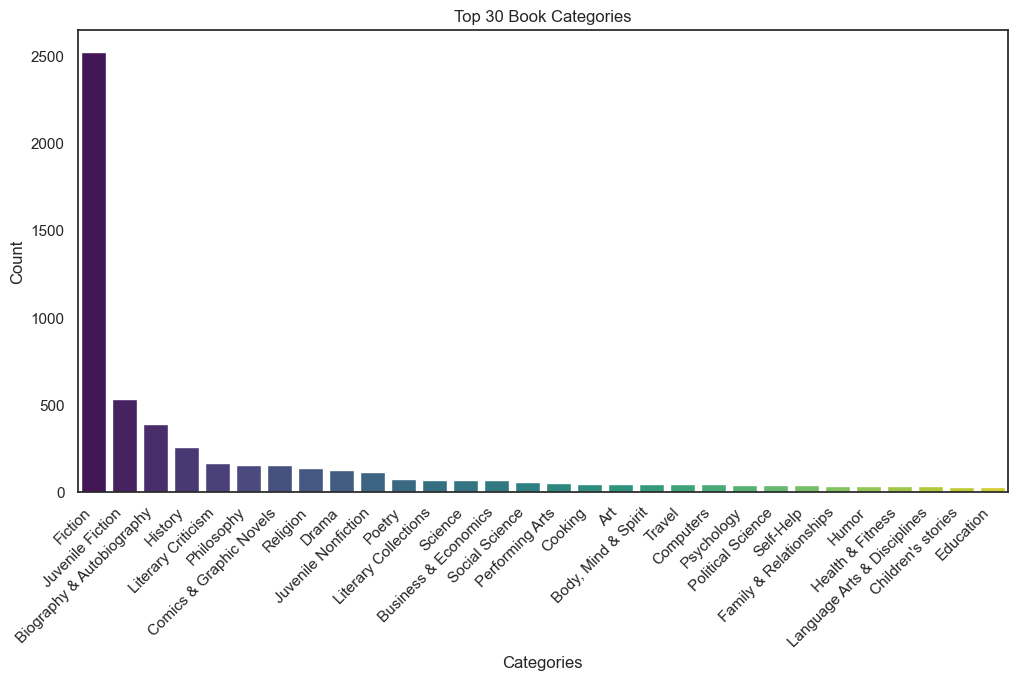

In [16]:

# Select top N categories to plot (e.g., top 10)
top_n = 30
top_categories = unique_categories_count.head(top_n)

# Set figure size
plt.figure(figsize=(12, 6))

# Create a barplot
sns.barplot(
    data=top_categories, 
    x="categories", 
    y="count", 
    palette="viridis"
)

# Rotate x labels for better visibility
plt.xticks(rotation=45, ha="right")

# Add labels and title
plt.xlabel("Categories")
plt.ylabel("Count")
plt.title(f"Top {top_n} Book Categories")

# Show the plot
plt.show()


In [17]:
df["words_in_description"]=df["description"].str.split().str.len()

In [18]:
df[df["words_in_description"].between(25,34)].shape

(1229, 15)

In [19]:
df.loc[df["words_in_description"].between(25,34),"description"].shape

(1229,)

In [20]:
df = df[df["words_in_description"] >= 25]
df.shape

(5197, 15)

In [21]:
df["title_and_subtitle"] = (
    np.where(df["subtitle"].isna(), df["title"], 
             df[["title", "subtitle"]].astype(str).agg(":".join, axis=1))
)

In [22]:
df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_desc,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,20.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,24.0,205,Spider's Web:A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,31.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,22.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,22.0,75,The Problem of Pain


In [23]:
df["tagged_description"] = df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

In [24]:
df.columns

Index(['isbn13', 'isbn10', 'title', 'subtitle', 'authors', 'categories',
       'thumbnail', 'description', 'published_year', 'average_rating',
       'num_pages', 'ratings_count', 'missing_desc', 'age_of_book',
       'words_in_description', 'title_and_subtitle', 'tagged_description'],
      dtype='object')

In [25]:
(
    df.drop(["subtitle", "missing_desc", "age_of_book", "words_in_description"], axis=1)
    .to_csv("books_preprocessed.csv", index=False)
)

## Langachain

In [26]:
from langchain_community.document_loaders import TextLoader
from langchain_text_splitters import CharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from langchain_chroma import Chroma
import os
from dotenv import load_dotenv

load_dotenv()


True

In [27]:
api_key = os.getenv("OPENAI_API_KEY")

In [28]:
books_df = pd.read_csv("books_preprocessed.csv")

In [29]:
books_df.shape

(5197, 13)

In [30]:
books_df["tagged_description"].head()

0    9780002005883 A NOVEL THAT READERS and critics...
1    9780002261982 A new 'Christie for Christmas' -...
2    9780006178736 A memorable, mesmerizing heroine...
3    9780006280897 Lewis' work on the nature of lov...
4    9780006280934 "In The Problem of Pain, C.S. Le...
Name: tagged_description, dtype: object

In [31]:
books_df["tagged_description"].to_csv("tagged_description.txt",
                                      sep="\n",
                                      index=False,
                                      header=False
                                      )

In [32]:
raw_doc = TextLoader("tagged_description.txt").load()
text_splitter = CharacterTextSplitter(chunk_size=0, chunk_overlap=0, separator="\n")

In [33]:
documents = text_splitter.split_documents(raw_doc)

Created a chunk of size 1168, which is longer than the specified 0
Created a chunk of size 1214, which is longer than the specified 0
Created a chunk of size 373, which is longer than the specified 0
Created a chunk of size 309, which is longer than the specified 0
Created a chunk of size 483, which is longer than the specified 0
Created a chunk of size 482, which is longer than the specified 0
Created a chunk of size 960, which is longer than the specified 0
Created a chunk of size 188, which is longer than the specified 0
Created a chunk of size 843, which is longer than the specified 0
Created a chunk of size 296, which is longer than the specified 0
Created a chunk of size 197, which is longer than the specified 0
Created a chunk of size 881, which is longer than the specified 0
Created a chunk of size 1088, which is longer than the specified 0
Created a chunk of size 1189, which is longer than the specified 0
Created a chunk of size 304, which is longer than the specified 0
Create

In [34]:
documents[0].page_content

'9780002005883 A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the wors

In [35]:
db_books = Chroma.from_documents(
    documents,
    embedding=OpenAIEmbeddings(api_key=api_key)
)

In [36]:
query = "book about astronomy"
docs = db_books.similarity_search(query, k=10)
docs

[Document(id='d4608220-7b88-4016-a64a-f5afd9445c12', metadata={'source': 'tagged_description.txt'}, page_content="9780764584657 A beginner's guide to astronomy features information about the solar system as well as star maps and a monthly guide on locating the planets in the sky."),
 Document(id='7328d189-5615-45c6-834d-5494a9e1b36a', metadata={'source': 'tagged_description.txt'}, page_content='"9780471265184 ""A lively, up-to-date account of the basic principles of astronomy and exciting current field of research.""-Science Digest For a quarter of a century, Astronomy: A Self-Teaching Guide has been making students and amateur stargazers alike feel at home among the stars. From stars, planets and galaxies, to black holes, the Big Bang and life in space, this title has been making it easy for beginners to quickly grasp the basic concepts of astronomy for over 25 years. Updated with the latest discoveries in astronomy and astrophysics, this newest edition of Dinah Moch?\'s classic guide

In [37]:
int(docs[0].page_content.split()[0].strip())

9780764584657

In [38]:
books_df[books_df["isbn13"]==int(docs[0].page_content.split()[0].strip())]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
3604,9780764584657,0764584650,Astronomy For Dummies,Stephen P. Maran,Science,http://books.google.com/books/content?id=iH4Fn...,A beginner's guide to astronomy features infor...,2005.0,3.83,318.0,271.0,Astronomy For Dummies,9780764584657 A beginner's guide to astronomy ...


In [39]:
def retrieve_sementic_recommendations(books_df, query:str, top_k:int=10) -> pd.DataFrame:
    docs = db_books.similarity_search(query, k=50)
    recommendations = []
    
    for i in range(0, len(docs)):
        recommendations += [int(docs[i].page_content.strip('"').split()[0])]
        
    return books_df[books_df["isbn13"].isin(recommendations)].head(top_k)

In [40]:
retrieve_sementic_recommendations(books_df, "book about astronomy")

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description
543,9780099928409,009992840X,Ratner's Star,Don DeLillo,Life on other planets,http://books.google.com/books/content?id=GTJAN...,Billy Twillig has won the first Nobel Prize ev...,1976.0,3.49,448.0,1478.0,Ratner's Star,9780099928409 Billy Twillig has won the first ...
549,9780131871656,013187165X,Astronomy,Eric Chaisson;Stephen McMillan,Mathematics,http://books.google.com/books/content?id=1O00A...,This introduction to astronomy features an exc...,2006.0,3.85,499.0,153.0,Astronomy:a beginner's guide to the universe,9780131871656 This introduction to astronomy f...
816,9780142402931,0142402931,The Far Side of Evil,Sylvia Engdahl,Juvenile Fiction,http://books.google.com/books/content?id=7nijj...,A young girl from an advanced civilization is ...,2005.0,3.98,324.0,57.0,The Far Side of Evil,9780142402931 A young girl from an advanced ci...
833,9780142500378,0142500372,Enchantress from the Stars,Sylvia Louise Engdahl,Juvenile Fiction,http://books.google.com/books/content?id=rntJA...,When young Elana unexpectedly joins the team l...,2003.0,3.94,304.0,2031.0,Enchantress from the Stars,9780142500378 When young Elana unexpectedly jo...
915,9780156032391,0156032392,On Literature,Umberto Eco,Literary Collections,http://books.google.com/books/content?id=i4q8C...,A collection of essays and addresses includes ...,2005.0,3.95,352.0,1669.0,On Literature,9780156032391 A collection of essays and addre...
1273,9780312861438,0312861435,The Memory of Whiteness,Kim Stanley Robinson,Fiction,http://books.google.com/books/content?id=NZak7...,"In the year 3229 AD, when the best and sometim...",1996.0,3.56,352.0,431.0,The Memory of Whiteness:A Scientific Romance,"9780312861438 In the year 3229 AD, when the be..."
1276,9780312864743,0312864744,Ports of Call,Jack Vance,Fiction,http://books.google.com/books/content?id=_Zu4S...,A romantic tale follows a space swashbuckler a...,1999.0,3.53,300.0,395.0,Ports of Call,9780312864743 A romantic tale follows a space ...
1288,9780312890216,0312890214,The Starry Rift,James Tiptree,Fiction,NaN,This novel set in the far-future and filled wi...,1994.0,3.82,250.0,220.0,The Starry Rift,9780312890216 This novel set in the far-future...
1351,9780316281331,0316281336,"The World Treasury of Physics, Astronomy, and ...",Timothy Ferris;Clifton Fadiman,Education,http://books.google.com/books/content?id=zryXG...,The writings of more than 60 authors including...,1993.0,4.12,859.0,361.0,"The World Treasury of Physics, Astronomy, and ...",9780316281331 The writings of more than 60 aut...
1449,9780345346292,0345346297,The Dragons of Eden,Carl Sagan,Nature,http://books.google.com/books/content?id=Nmkoz...,The well-known astronomer and astrobiologist s...,1977.0,4.17,271.0,14974.0,The Dragons of Eden:Speculations on the Evolut...,9780345346292 The well-known astronomer and as...


In [41]:
books_df["categories"].value_counts().reset_index()

,categories,count
0,Fiction,2111
1,Juvenile Fiction,390
2,Biography & Autobiography,311
3,History,207
4,Literary Criticism,124
...,...,...
474,Conspiracies,1
475,Brothers and sisters,1
476,Rock musicians,1
477,Community life,1


In [42]:
category_mapping = {
    "Fiction": "Fiction",
    "Juvenile Fiction": "Children's Fiction",
    "Biography & Autobiography" : "Nonfiction",
    "History" : "Nonfiction",
    "Literary Criticism" : "Nonfiction",
    "Philosophy": "Nonfiction",
    "Religion": "Nonfiction",
    "Comic & Graphic Novels" : "Fiction",
    "Drama" : "Fiction",
    "Juvenile Nonfiction" : "Children's Fiction",
    "Science" : "Nonfiction",
    "Poetry" : "Fiction"
}

books_df["simple_categories"] = books_df["categories"].map(category_mapping)

In [43]:
books_df[:2]

,isbn13,isbn10,title,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,title_and_subtitle,tagged_description,simple_categories
0,9780002005883,0002005883,Gilead,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,Gilead,9780002005883 A NOVEL THAT READERS and critics...,Fiction
1,9780002261982,0002261987,Spider's Web,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,Spider's Web:A Novel,9780002261982 A new 'Christie for Christmas' -...,NaN


In [44]:
books_df["simple_categories"].isna().value_counts()

simple_categories
False    3627
True     1570
Name: count, dtype: int64

### LLM utilization

In [63]:
from transformers import pipeline
pipe = pipeline("zero-shot-classification",
                model="facebook/bart-large-mnli")

Device set to use cpu


In [59]:
fiction_categories = ["Fiction", "Nonfiction"]
sequence = books_df.loc[books_df["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[0]
sequence

'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst the world ha

In [64]:
pipe(sequence, fiction_categories)

{'sequence': 'A NOVEL THAT READERS and critics have been eagerly anticipating for over a decade, Gilead is an astonishingly imagined story of remarkable lives. John Ames is a preacher, the son of a preacher and the grandson (both maternal and paternal) of preachers. It’s 1956 in Gilead, Iowa, towards the end of the Reverend Ames’s life, and he is absorbed in recording his family’s story, a legacy for the young son he will never see grow up. Haunted by his grandfather’s presence, John tells of the rift between his grandfather and his father: the elder, an angry visionary who fought for the abolitionist cause, and his son, an ardent pacifist. He is troubled, too, by his prodigal namesake, Jack (John Ames) Boughton, his best friend’s lost son who returns to Gilead searching for forgiveness and redemption. Told in John Ames’s joyous, rambling voice that finds beauty, humour and truth in the smallest of life’s details, Gilead is a song of celebration and acceptance of the best and the worst

In [67]:
max_index=np.argmax(pipe(sequence, fiction_categories)["scores"])
max_label=pipe(sequence, fiction_categories)["labels"][max_index]
max_label

'Fiction'

In [68]:
def generate_predictions(sequence, fiction_categories):
    pred=pipe(sequence, fiction_categories)
    max_index=np.argmax(pred["scores"])
    max_label=pred["labels"][max_index]
    return max_label

In [69]:
from tqdm import tqdm

actual_cats = []
predicted_cats = []

for i in tqdm(range(0, 300)):
    sequence = books_df.loc[books_df["simple_categories"] == "Fiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Fiction"]
    

100%|██████████| 300/300 [07:28<00:00,  1.49s/it]


In [70]:
for i in tqdm(range(0, 300)):
    sequence = books_df.loc[books_df["simple_categories"] == "Nonfiction", "description"].reset_index(drop=True)[i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    actual_cats += ["Nonfiction"]

100%|██████████| 300/300 [08:08<00:00,  1.63s/it]


In [71]:
predictions_df = pd.DataFrame({"actual_category": actual_cats, "predicted_category": predicted_cats})
predictions_df

,actual_category,predicted_category
0,Fiction,Fiction
1,Fiction,Fiction
2,Fiction,Fiction
3,Fiction,Nonfiction
4,Fiction,Fiction
...,...,...
595,Nonfiction,Nonfiction
596,Nonfiction,Fiction
597,Nonfiction,Nonfiction
598,Nonfiction,Nonfiction


In [72]:
predictions_df["correct_prediction"] = (
    np.where(predictions_df["actual_category"]==predictions_df["predicted_category"], 1, 0)
)

In [73]:
predictions_df["correct_prediction"].sum()/len(predictions_df)

0.7783333333333333

In [74]:
isbns = []
predicted_cats = []

missing_categories = books_df.loc[books_df["simple_categories"].isna(), ["isbn13", "description"]].reset_index(drop=True)

In [76]:
missing_categories

,isbn13,description
0,9780002261982,A new 'Christie for Christmas' -- a full-lengt...
1,9780006280897,Lewis' work on the nature of love divides love...
2,9780006280934,"""In The Problem of Pain, C.S. Lewis, one of th..."
3,9780006380832,Until Vasco da Gama discovered the sea-route t...
4,9780006470229,A new-cover reissue of the fourth book in the ...
...,...,...
1565,9788125026600,Not only does Nietzsche for Beginners delve in...
1566,9788171565641,"Forster's lively, informed originality and wit..."
1567,9788172235222,On A Train Journey Home To North India After L...
1568,9788173031014,This book tells the tale of a man who goes on ...


In [77]:
for i in tqdm(range(0, len(missing_categories))):
    sequence = missing_categories["description"][i]
    predicted_cats += [generate_predictions(sequence, fiction_categories)]
    isbns += [missing_categories["isbn13"][i]]

100%|██████████| 1570/1570 [36:32<00:00,  1.40s/it]


In [80]:
missing_predicted_df = pd.DataFrame({"isbn13": isbns, "predicted_category": predicted_cats})
missing_predicted_df["predicted_category"].value_counts()

predicted_category
Nonfiction    1051
Fiction        519
Name: count, dtype: int64

In [88]:
missing_predicted_df

,isbn13,predicted_category
0,9780002261982,Fiction
1,9780006280897,Nonfiction
2,9780006280934,Nonfiction
3,9780006380832,Nonfiction
4,9780006470229,Fiction
...,...,...
1565,9788125026600,Nonfiction
1566,9788171565641,Fiction
1567,9788172235222,Fiction
1568,9788173031014,Nonfiction


In [95]:
books_df = pd.merge(books_df, missing_predicted_df, on="isbn13", how="left")
books_df["simple_categories"] = np.where(books_df["simple_categories"].isna(), books_df["predicted_category"], books_df["simple_categories"])
books_df = books_df.drop(columns=["predicted_category"])


In [98]:
books_df.columns

Index(['isbn13', 'isbn10', 'title', 'authors', 'categories', 'thumbnail',
       'description', 'published_year', 'average_rating', 'num_pages',
       'ratings_count', 'title_and_subtitle', 'tagged_description',
       'simple_categories'],
      dtype='object')

In [99]:
books_df.to_csv("books_with_categories.csv", index=False)